<a href="https://colab.research.google.com/github/Saerom-Park/Computer-Vision/blob/main/%EC%BB%B4%ED%93%A8%ED%84%B0%EB%B9%84%EC%A0%84%201%EC%B0%A8%20%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

컴퓨터 비전 1차 과제
- 과제 기한: 10월 18일 자정

- 과제명: 주어진 영상을 일고 4연결성/8연결성을 이용하여 영상을 라벨링하여 색칠하기

- 제출방법: colab에서 프로그램을 작성한 후 " .py" 확장자로 다운로드하여 가상대학에 제출하시기 바람

- 파일명: 학번.py

- 과제 제출 기한을 반드시 지키고, 이후에 제출시 감정



Python 버전 확인

In [ ]:
!python --version

Python 3.7.12


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
cv2.__version__

'4.1.2'

이미지 다운로드

In [ ]:
!wget https://i.imgur.com/iWGMlJR.png
!mv iWGMlJR.png sample.png

--2021-10-15 14:15:21--  https://i.imgur.com/iWGMlJR.png
Resolving i.imgur.com (i.imgur.com)... 151.101.248.193
Connecting to i.imgur.com (i.imgur.com)|151.101.248.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 491 [image/png]
Saving to: ‘iWGMlJR.png’

iWGMlJR.png         100%[===================>]     491  --.-KB/s    in 0s      

2021-10-15 14:15:21 (42.2 MB/s) - ‘iWGMlJR.png’ saved [491/491]



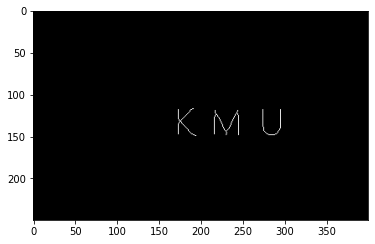

In [ ]:
img = cv2.imread('sample.png')

# image 출력
plt.imshow(img)
plt.show()

# 4연결성과 8연결성 라벨링 출력 예시
## 숫자로 표시
![alt text](https://i.imgur.com/lQ9nXox.png)
## 색상으로 표시
![alt text](https://i.imgur.com/91M3MwP.png)

# 과제1: 4연결성 라벨링

- 위의 4연결성(4-neighbors) 라벨링과 같이 숫자 또는 색을 이용하여 라벨링하시오.
- cf. 색의 종류에는 제한이 없고, 연결된 픽셀은 같은 숫자 또는 같은 색을 가져야함.

In [ ]:
def four_connect(img):
    # 함수 작성
    img = np.where(img==0,0,-1) # 0은 0, 나머지는 -1로
    label = 0
    width, height, channel = img.shape
    def flood_fill4(img, i, j, s, label):
      if img[i][j][s]==-1:
        img[i][j][s] = label
        flood_fill4(img,i,j+1,s,label) # 오른쪽
        flood_fill4(img,i-1,j,s,label) # 위쪽
        flood_fill4(img,i,j-1,s,label) # 왼쪽
        flood_fill4(img,i+1,j,s,label) # 아래쪽
    
    for k in range(0,channel): # 채널마다 라벨 0부터 count
      label = 0
      for i in range(1,width-2): # 1부터 width-2
        for j in range(1,height-2): # 1부터 height-2
          if img[i][j][k]==-1: # img의 [i][j][k] 값이 -1이면 label에 1 더함
            label+=1
            flood_fill4(img,i,j,k,label*(0.3+k)*100) # [i][j][k] 값 주변 4-연속성 파악. 색을 구분하기 위해label에 (0.3+k)*100한 값으로 color 채움

    return  img, label

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


label 수 :  81


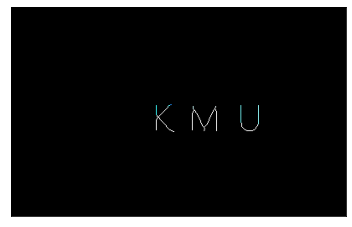

In [ ]:
img = cv2.imread('sample.png')

labeled_img, label = four_connect(img)
print('label 수 : ', label)

# image 출력
plt.imshow(labeled_img)
plt.grid(None)   
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
label

81

# 과제2: 8연결성 라벨링
- 위의 8연결성(8-neighbors) 라벨링과 같이 숫자 또는 색을 이용하여 라벨링하시오.
- cf. 색의 종류에는 제한이 없고, 연결된 픽셀은 같은 숫자 또는 같은 색을 가져야함.-

In [ ]:
def eight_connect(img):
    # 함수 작성
    img = np.where(img==0,0,-1) # 0은 0, 나머지는 -1로
    label = 0
    width, height, channel = img.shape
    def flood_fill8(img, i, j, s, label):
      if img[i][j][s]==-1:
        img[i][j][s] = label
        flood_fill8(img,i,j+1,s,label) # 오른쪽
        flood_fill8(img,i-1,j,s,label) # 위쪽
        flood_fill8(img,i,j-1,s,label) # 왼쪽
        flood_fill8(img,i+1,j,s,label) # 아래쪽
        flood_fill8(img,i+1,j+1,s,label) #대각선 
        flood_fill8(img,i-1,j+1,s,label)
        flood_fill8(img,i+1,j-1,s,label)
        flood_fill8(img,i-1,j-1,s,label)
    
    
    for k in range(0,channel):# 채널마다 라벨 0부터 count
      label = 0
      for i in range(1,width-2): # 1부터 width-2
        for j in range(1,height-2): # 1부터 height-2
          if img[i][j][k]==-1: # img의 [i][j][k] 값이 -1이면 label에 1 더함
            label+=1
            flood_fill8(img,i,j,k,label*(3-k)*100)# [i][j][k] 값 주변 8-연속성 파악. 색을 구분하기 위해label에 (3-k)*100 곱한 값으로 color 채움

    return  img, label

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


label 수 :  3


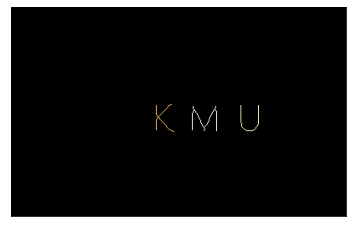

In [ ]:
img = cv2.imread('sample.png')

labeled_img, label = eight_connect(img)
print('label 수 : ', label)

# image 출력
plt.imshow(labeled_img)
plt.grid(None)   
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
label

3